In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import for Colab


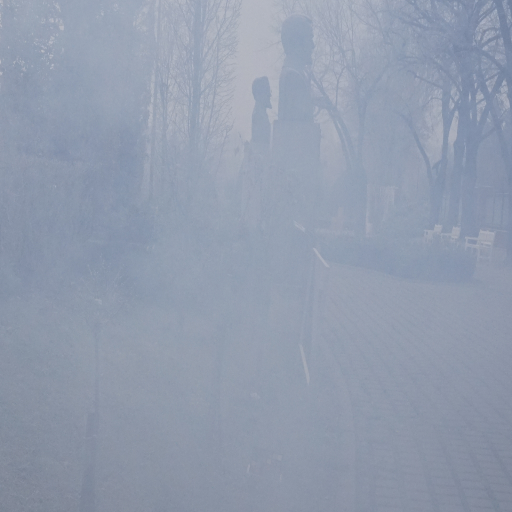

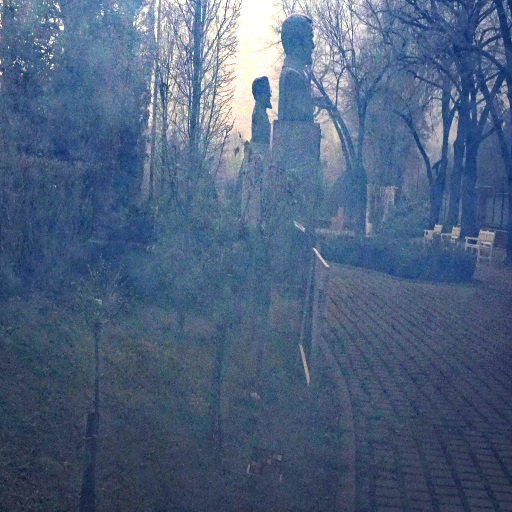

In [ ]:
import cv2
import numpy as np

def dark_channel(img, patch_size=15):
    """Compute the dark channel of the image."""
    min_channel = np.min(img, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    return cv2.erode(min_channel, kernel)

def atmospheric_light(img, dark_channel, top_percent=0.1):
    """Estimate the atmospheric light using the brightest pixels in the dark channel."""
    h, w = dark_channel.shape
    num_pixels = int(h * w * top_percent)
    indices = np.argsort(dark_channel.ravel())[-num_pixels:]
    bright_pixels = img.reshape(-1, 3)[indices]
    return np.mean(bright_pixels, axis=0)

def transmission_map(img, A, omega=0.95, patch_size=15):
    """Estimate the transmission map."""
    norm_img = img / A
    dark = dark_channel(norm_img, patch_size)
    return 1 - omega * dark

def refine_transmission(trans, img, radius=15, eps=1e-3):
    """Refine transmission using guided filtering to reduce artifacts."""
    return cv2.ximgproc.guidedFilter(img.astype(np.float32), trans.astype(np.float32), radius, eps)

def dehaze(img, omega=0.95, patch_size=15, t_min=0.1):
    """Perform image dehazing using Dark Channel Prior."""
    img = img.astype(np.float32) / 255.0
    dark = dark_channel(img, patch_size)
    A = atmospheric_light(img, dark)
    trans = transmission_map(img, A, omega, patch_size)

    # Use guided filter for better transmission map estimation
    trans = refine_transmission(trans, img, radius=15, eps=1e-3)
    trans = np.clip(trans, t_min, 1)

    # Recover the dehazed image
    J = (img - A) / trans[:, :, np.newaxis] + A
    return np.clip(J * 255, 0, 255).astype(np.uint8)

# Load the image
hazy_img = cv2.imread("/content/07_hazy.png")

# Check if image loaded successfully
if hazy_img is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Resize to avoid memory crash (adjust as needed)
    hazy_img = cv2.resize(hazy_img, (512, 512))

    # Apply dehazing
    dehazed_img = dehaze(hazy_img)

    # Display the results
    cv2_imshow(hazy_img)
    cv2_imshow(dehazed_img)

    # Save the dehazed image
    cv2.imwrite("dehazed_output_7.png", dehazed_img)

    cv2.waitKey(0)  # Wait for a key press
    cv2.destroyAllWindows()  # Close the display windows


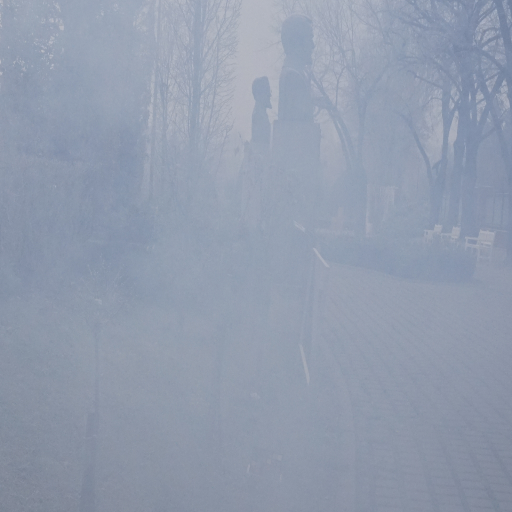

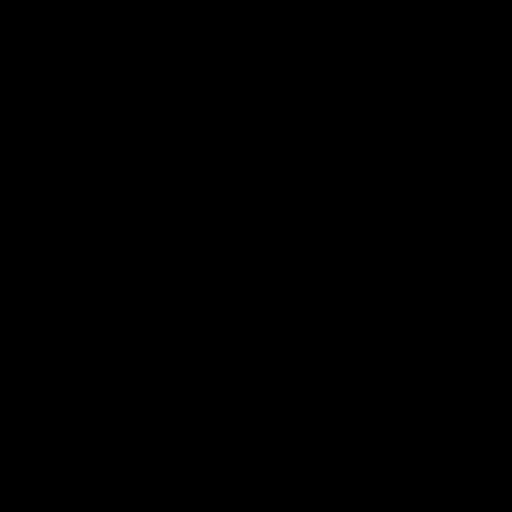

Estimated Atmospheric Light: [0.73070925 0.67169154 0.6417502 ]


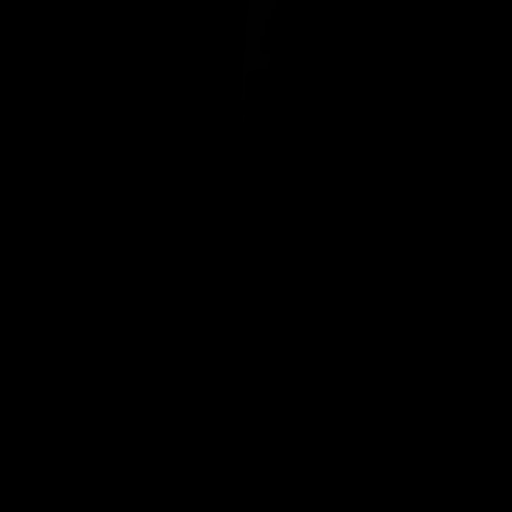

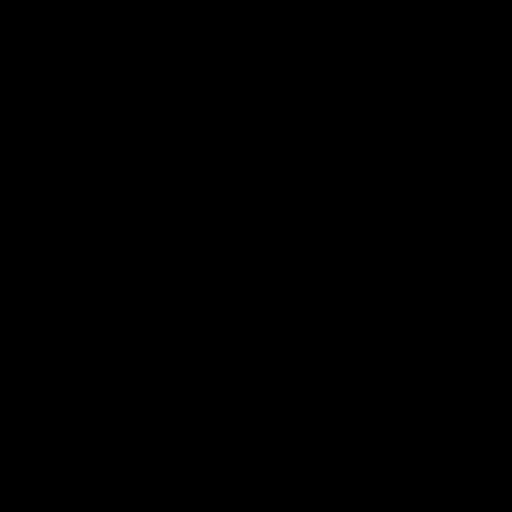

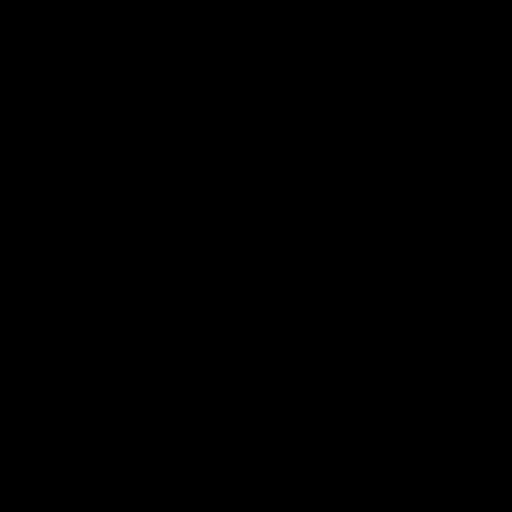

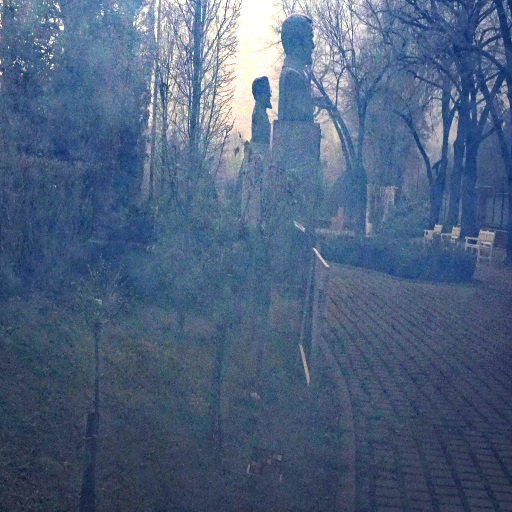

In [ ]:
import cv2
import numpy as np

def dark_channel(img, patch_size=15):
    """Compute the dark channel of the image."""
    min_channel = np.min(img, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark = cv2.erode(min_channel, kernel)
    cv2_imshow(dark)
    return dark

def atmospheric_light(img, dark_channel, top_percent=0.1):
    """Estimate the atmospheric light using the brightest pixels in the dark channel."""
    h, w = dark_channel.shape
    num_pixels = int(h * w * top_percent)
    indices = np.argsort(dark_channel.ravel())[-num_pixels:]
    bright_pixels = img.reshape(-1, 3)[indices]
    A = np.mean(bright_pixels, axis=0)
    print("Estimated Atmospheric Light:", A)
    return A

def transmission_map(img, A, omega=0.95, patch_size=15):
    """Estimate the transmission map."""
    norm_img = img / A
    dark = dark_channel(norm_img, patch_size)
    trans = 1 - omega * dark
    cv2_imshow(trans)
    return trans

def refine_transmission(trans, img, radius=15, eps=1e-3):
    """Refine transmission using guided filtering to reduce artifacts."""
    refined_trans = cv2.ximgproc.guidedFilter(img.astype(np.float32), trans.astype(np.float32), radius, eps)
    cv2_imshow(refined_trans)
    return refined_trans

def dehaze(img, omega=0.95, patch_size=15, t_min=0.1):
    """Perform image dehazing using Dark Channel Prior."""
    img = img.astype(np.float32) / 255.0
    dark = dark_channel(img, patch_size)
    A = atmospheric_light(img, dark)
    trans = transmission_map(img, A, omega, patch_size)

    # Use guided filter for better transmission map estimation
    trans = refine_transmission(trans, img, radius=15, eps=1e-3)
    trans = np.clip(trans, t_min, 1)

    # Recover the dehazed image
    J = (img - A) / trans[:, :, np.newaxis] + A
    dehazed_img = np.clip(J * 255, 0, 255).astype(np.uint8)
    cv2_imshow(dehazed_img)
    return dehazed_img

# Load the image
hazy_img = cv2.imread("/content/07_hazy.png")

# Check if image loaded successfully
if hazy_img is None:
    print("Error: Image not loaded. Check file path.")
else:
    # Resize to avoid memory crash (adjust as needed)
    hazy_img = cv2.resize(hazy_img, (512, 512))
    cv2_imshow(hazy_img)

    # Apply dehazing
    dehazed_img = dehaze(hazy_img)

    # Save the dehazed image
    cv2.imwrite("dehazed_output_7.png", dehazed_img)

    cv2.waitKey(0)  # Wait for a key press
    cv2.destroyAllWindows()  # Close the display windows

In [ ]:
!git clone https://github.com/weberwcwei/AODnet-by-pytorch.git
!cd AODnet-by-pytorch
!pip install -r requirements.txt  # If a requirements file exists


Cloning into 'AODnet-by-pytorch'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 67 (delta 9), reused 65 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 6.40 MiB | 33.96 MiB/s, done.
Resolving deltas: 100% (9/9), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!git clone https://github.com/zhilin007/FFA-Net.git
!cd FFA-Net
!pip install -r requirements.txt


Cloning into 'FFA-Net'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 188 (delta 1), reused 6 (delta 1), pack-reused 182 (from 1)
Receiving objects: 100% (188/188), 19.04 MiB | 26.83 MiB/s, done.
Resolving deltas: 100% (81/81), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!pip install numpy torch torchvision opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import sys

# Add path where FFA.py is located
sys.path.append("/content/FFA-Net/net/models/")

# Import FFA from the correct location
from FFA import FFA

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the FFA model (Ensure correct gps and blocks values)
model = FFA(gps=3, blocks=19).to(device)

# Load the checkpoint properly
#heckpoint = torch.load("/content/ots_train_ffa_3_19.pk", map_location=device)

# Extract only the model's state dictionary
# Load checkpoint
checkpoint = torch.load("/content/ots_train_ffa_3_19.pk", map_location=device)

# Remove 'module.' prefix if present
from collections import OrderedDict

new_state_dict = OrderedDict()
for k, v in checkpoint["model"].items():
    new_key = k.replace("module.", "")  # Remove 'module.' prefix
    new_state_dict[new_key] = v

# Load the modified state dictionary into the model
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

print("✅ FFA-Net Model Loaded Successfully!")


import torch




✅ FFA-Net Model Loaded Successfully!


<ipython-input-5-365299f30236>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("/content/ots_train_ffa_3_19.pk", map_location=device)


In [ ]:
import torch
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


Dehazed image saved at /content/dehazed_output_ffa_7_dcp.jpg


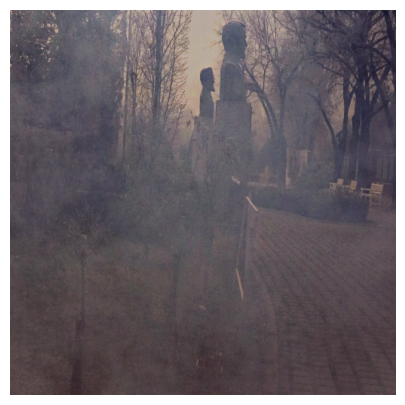

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Load image
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert to tensor (H, W, C) → (C, H, W)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust if needed
    ])
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    return image

# Inference Function
def dehaze_image(image_path, save_path=None):
    input_tensor = preprocess_image(image_path)

    with torch.no_grad():  # No gradient computation
        output = model(input_tensor)

    # Post-process output (convert tensor to image)
    output = output.squeeze(0).cpu().detach().numpy()  # Remove batch dimension
    output = np.transpose(output, (1, 2, 0))  # Change from (C, H, W) to (H, W, C)
    output = (output * 255).astype(np.uint8)  # Convert to 0-255 range

    # Save or Display Result
    if save_path:
        cv2.imwrite(save_path, cv2.cvtColor(output, cv2.COLOR_RGB2BGR))
        print(f"Dehazed image saved at {save_path}")

    # Show the output
    plt.figure(figsize=(10,5))
    plt.imshow(output)
    plt.axis("off")
    plt.show()

# Example Usage
image_path = "/content/dehazed_output_7.png"  # Change this to your test image path
save_path = "/content/dehazed_output_ffa_7_dcp.jpg"  # Optional, change if you want to save
dehaze_image(image_path, save_path)

In [ ]:
import cv2
import numpy as np
import math

def compute_psnr(original_path, dehazed_path):
    """Computes PSNR between original and dehazed images after resizing."""

    # Load images
    original = cv2.imread(original_path)  # Read as BGR
    dehazed = cv2.imread(dehazed_path)  # Read as BGR

    # Resize dehazed image to match original image dimensions
    dehazed = cv2.resize(dehazed, (original.shape[1], original.shape[0]))

    # Convert to grayscale (optional, but common for PSNR)
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    dehazed_gray = cv2.cvtColor(dehazed, cv2.COLOR_BGR2GRAY)

    # Compute MSE (Mean Squared Error)
    mse = np.mean((original_gray - dehazed_gray) ** 2)

    if mse == 0:
        return float('inf')  # If no difference, PSNR is infinite

    # Compute PSNR
    max_pixel = 255.0
    psnr = 10 * math.log10((max_pixel ** 2) / mse)
    return psnr

# Example Usage
original_path = "/content/07_hazy.png"     # Replace with actual path
dehazed_path = "/content/dehazed_output_ffa_7.jpg"  # Replace with actual path

psnr_value = compute_psnr(original_path, dehazed_path)
print(f"PSNR Value: {psnr_value:.2f} dB")


PSNR Value: 27.65 dB


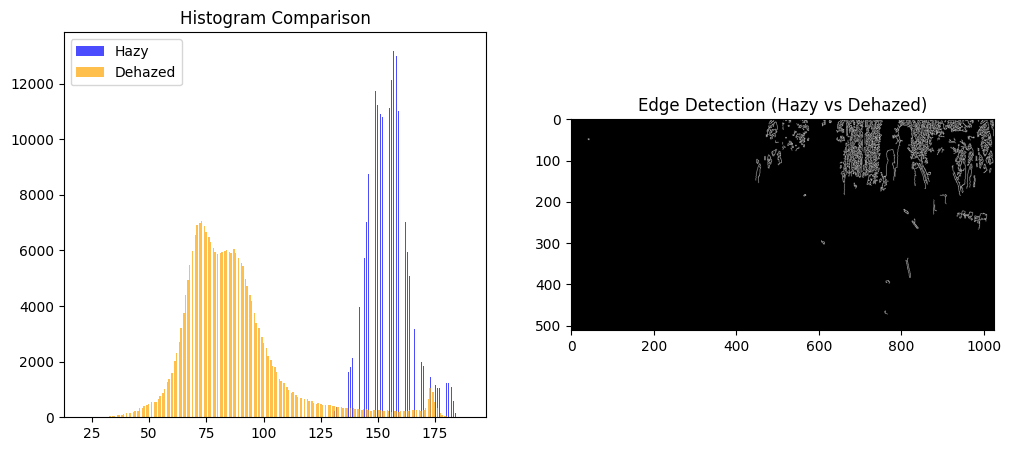

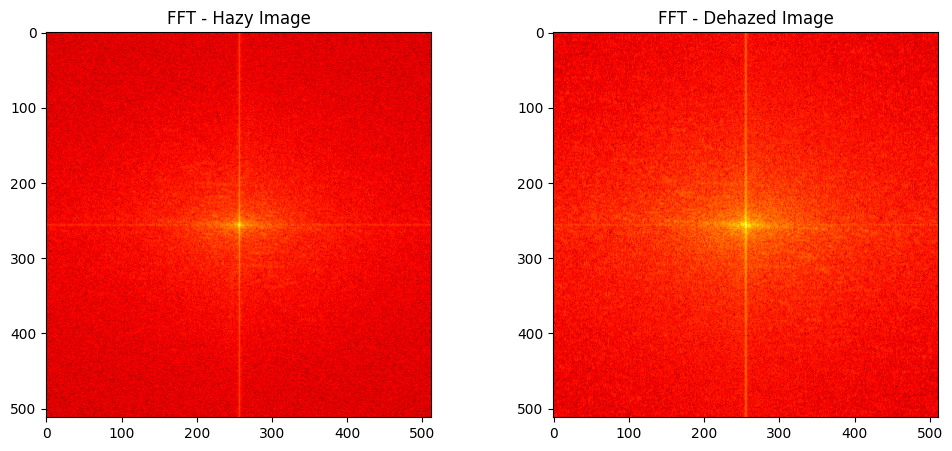

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
hazy_img = cv2.imread("/content/07_hazy.png", cv2.IMREAD_GRAYSCALE)
dehazed_img = cv2.imread("/content/dehazed_output_ffa_7_dcp.jpg", cv2.IMREAD_GRAYSCALE)

# Resize for consistency
hazy_img = cv2.resize(hazy_img, (512, 512))
dehazed_img = cv2.resize(dehazed_img, (512, 512))

# Plot histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(hazy_img.ravel(), bins=256, color='blue', alpha=0.7, label="Hazy")
plt.hist(dehazed_img.ravel(), bins=256, color='orange', alpha=0.7, label="Dehazed")
plt.title("Histogram Comparison")
plt.legend()

# Apply Canny Edge Detection
hazy_edges = cv2.Canny(hazy_img, 50, 150)
dehazed_edges = cv2.Canny(dehazed_img, 50, 150)

# Display edges
plt.subplot(1, 2, 2)
plt.imshow(np.hstack([hazy_edges, dehazed_edges]), cmap='gray')
plt.title("Edge Detection (Hazy vs Dehazed)")

plt.show()

# Fourier Transform Analysis
def fft_magnitude_spectrum(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

hazy_fft = fft_magnitude_spectrum(hazy_img)
dehazed_fft = fft_magnitude_spectrum(dehazed_img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(hazy_fft, cmap='hot')
plt.title("FFT - Hazy Image")

plt.subplot(1, 2, 2)
plt.imshow(dehazed_fft, cmap='hot')
plt.title("FFT - Dehazed Image")

plt.show()


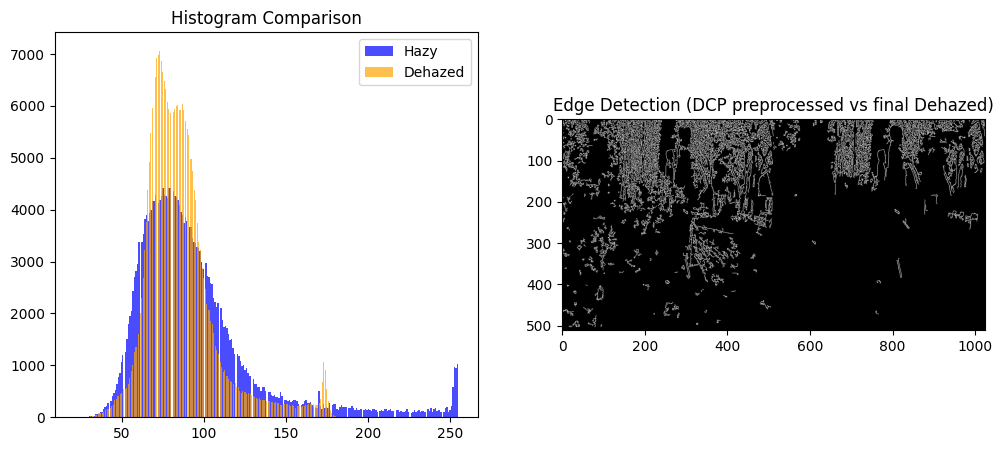

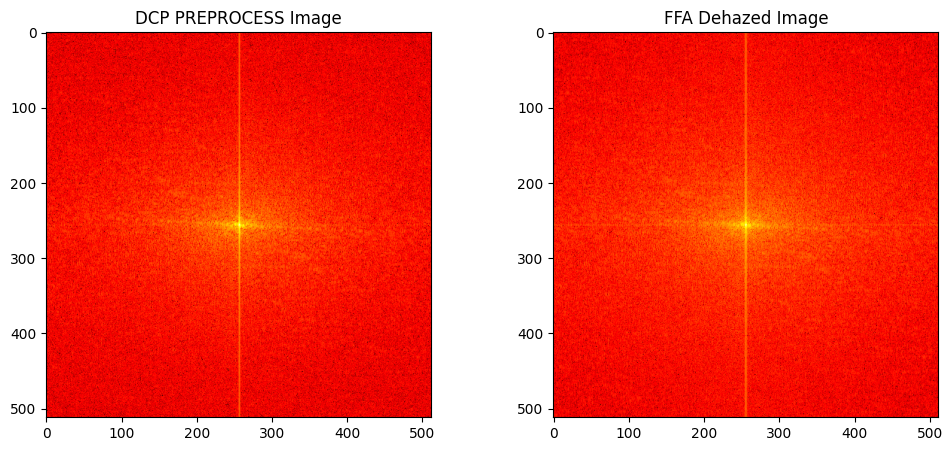

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
hazy_img = cv2.imread("/content/dehazed_output_7.png", cv2.IMREAD_GRAYSCALE)
dehazed_img = cv2.imread("/content/dehazed_output_ffa_7_dcp.jpg", cv2.IMREAD_GRAYSCALE)

# Resize for consistency
hazy_img = cv2.resize(hazy_img, (512, 512))
dehazed_img = cv2.resize(dehazed_img, (512, 512))

# Plot histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(hazy_img.ravel(), bins=256, color='blue', alpha=0.7, label="Hazy")
plt.hist(dehazed_img.ravel(), bins=256, color='orange', alpha=0.7, label="Dehazed")
plt.title("Histogram Comparison")
plt.legend()

# Apply Canny Edge Detection
hazy_edges = cv2.Canny(hazy_img, 50, 150)
dehazed_edges = cv2.Canny(dehazed_img, 50, 150)

# Display edges
plt.subplot(1, 2, 2)
plt.imshow(np.hstack([hazy_edges, dehazed_edges]), cmap='gray')
plt.title("Edge Detection (DCP preprocessed vs final Dehazed)")

plt.show()

# Fourier Transform Analysis
def fft_magnitude_spectrum(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

hazy_fft = fft_magnitude_spectrum(hazy_img)
dehazed_fft = fft_magnitude_spectrum(dehazed_img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(hazy_fft, cmap='hot')
plt.title("DCP PREPROCESS Image")

plt.subplot(1, 2, 2)
plt.imshow(dehazed_fft, cmap='hot')
plt.title("FFA Dehazed Image")

plt.show()
